In [19]:
from os import listdir
from os.path import isfile, join

mypath = './example_Kr_docs/'
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]

total_docs = []
for file in onlyfiles:
    file_path = mypath+file
    with open(file_path, 'r', encoding='utf8') as f:
        content = f.read()
    total_docs.append(content)

In [20]:
total_text =''
for doc in total_docs:
    total_text = total_text+' '+doc

In [21]:
from kornounextractor.noun_extractor import extract
with open('dic.txt', 'w', encoding='utf8') as f:
    for word in sorted(extract(total_text, freq=1.0)):
        f.write(word+'\tNNG\n')

In [22]:
import konlpy.tag
komoran = konlpy.tag.Komoran(userdic='dic.txt')

In [23]:
stopwords = ['하며','동아일보','경향신문','조선일보','단독', '핫한', '한겨레', '재테크','재배포','동아닷컴','우리','사진','진행','.co','.kr','나가기','페이스북','.com','오전','18일', '19일', '이날','이번', '있다','홈페이지', '기자', '무단전재', '무단', '보기경향신문', '클릭', '하기', '금지', '기자', '뉴스', '기사', 'AP통신', 'Copyrights', 'SNS', 'chosuncom', 'dongacom', 'hyopdhanicokr', 'tbs', 'wwwkhancokr']

In [24]:
def remove_words(words):
    new_words=[word for word in words if len(word)>1 and word not in stopwords]
    return new_words

In [25]:
docs_nouns = [remove_words(komoran.nouns(doc.replace('\n',' '))) for doc in total_docs]

In [26]:
len(docs_nouns)

13

In [27]:
print(docs_nouns[0])

['동행', '경제인', '저녁', '위원장', '내외', '나중', '합류', '해외', '방문', '식사', '외교', '식당', '현지', '호흡', '문재인', '대통령', '김정숙', '여사', '오후', '대동강', '수산물식당', '평양', '시민', '대화', '평양사진공동취재단', '서성', '문재인', '대통령', '평양', '방문', '이틀', '평양', '대동강', '수산물식당', '저녁식사', '평양', '시민', '이용', '일반', '식당', '현지', '정서', '대통령', '해외', '방문', '현지', '주민', '식당', '식사', '외교', '당초', '대통령', '실무진', '방북', '경제인', '식사', '초청', '계획', '예정', '김정은', '북한', '국무위원장', '내외', '합류', '자리', '성격', '정상', '친교', '자리', '대통령', '내외', '오후', '이재용', '삼성그룹', '부회장', '최태원', 'SK', '회장', '현정', '현대그룹', '회장', '능라', '경기장', '근처', '식당', '대통령', '대표', '요리', '재료', '철갑상어', '대통령', '자신', '식사', '초밥식사실', '식사', '북한', '일반', '주민', '테이블', '인사', '북한', '주민', '신기', '표정', '박수', '대통령', '악수', '대통령', '주민', '음식', '대통령', '때쯤', '김영철', '노동당', '부위원장', '대통령', '몇분', '아래층', '함성', '김정은', '위원장', '등장', '의미', '대통령', '위원장', '내외', '오늘', '시간', '환영만찬', '옥류관', '오찬', '방문', '기간', '정상', '세번', '식사', '대통령', '중국', '베트남', '해외', '순방', '현지', '주민', '식당', '현지', '호흡', '방북', '준비', '과정', '주민', '식당', '섭외', '요청', '대동강', '수산물식당'

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer # tf-idf based DTM
def tfidf_extractor(corpus):
    # returns a tf-idf based DTM
    vectorizer = TfidfVectorizer(min_df=1, 
                                 norm='l2',
                                 smooth_idf=True,
                                 use_idf=True,
                                 ngram_range=(1,1))
    features = vectorizer.fit_transform(corpus)
    return vectorizer, features

In [29]:
documents_filtered = []
for doc in docs_nouns:
    document_filtered =''
    for word in doc:
        document_filtered = document_filtered+' '+word
    documents_filtered.append(document_filtered)

In [30]:
documents_filtered[0]

' 동행 경제인 저녁 위원장 내외 나중 합류 해외 방문 식사 외교 식당 현지 호흡 문재인 대통령 김정숙 여사 오후 대동강 수산물식당 평양 시민 대화 평양사진공동취재단 서성 문재인 대통령 평양 방문 이틀 평양 대동강 수산물식당 저녁식사 평양 시민 이용 일반 식당 현지 정서 대통령 해외 방문 현지 주민 식당 식사 외교 당초 대통령 실무진 방북 경제인 식사 초청 계획 예정 김정은 북한 국무위원장 내외 합류 자리 성격 정상 친교 자리 대통령 내외 오후 이재용 삼성그룹 부회장 최태원 SK 회장 현정 현대그룹 회장 능라 경기장 근처 식당 대통령 대표 요리 재료 철갑상어 대통령 자신 식사 초밥식사실 식사 북한 일반 주민 테이블 인사 북한 주민 신기 표정 박수 대통령 악수 대통령 주민 음식 대통령 때쯤 김영철 노동당 부위원장 대통령 몇분 아래층 함성 김정은 위원장 등장 의미 대통령 위원장 내외 오늘 시간 환영만찬 옥류관 오찬 방문 기간 정상 세번 식사 대통령 중국 베트남 해외 순방 현지 주민 식당 현지 호흡 방북 준비 과정 주민 식당 섭외 요청 대동강 수산물식당 고급 어족 실내 낚시터 위원장 인민생활 향상 기치 이름 부지 선정 시찰 인민봉사기지 관심'

In [31]:
vectorizer, DTM_tfidf = tfidf_extractor(documents_filtered)

In [32]:
import numpy as np

In [33]:
DTM_TFIDF = np.array(DTM_tfidf.todense())

In [34]:
from sklearn.cluster import AgglomerativeClustering

In [35]:
cluster_idf = AgglomerativeClustering(linkage='single', affinity='cosine', n_clusters=4).fit(DTM_np)

NameError: name 'DTM_np' is not defined

In [36]:
cluster_idf.labels_

NameError: name 'cluster_idf' is not defined

In [37]:
import networkx as nx
from sklearn.metrics.pairwise import cosine_similarity # cosine similarity 계산하기
import itertools

In [38]:
DOCS_NUM = len(docs_nouns)

In [39]:
DOCS_NUM 

13

In [40]:
clusters = []
g = nx.Graph()
g.add_nodes_from(list(range(DOCS_NUM)))
for pair in list(itertools.combinations(range(DOCS_NUM), 2)):
    similarity = cosine_similarity(DTM_TFIDF[pair[0]].reshape(1,-1), DTM_TFIDF[pair[1]].reshape(1,-1))[0][0]

    if similarity>0.15: # 문서간의 유사도 기준을 0.35로 한 경우
        g.add_edge(pair[0], pair[1], weight=similarity)

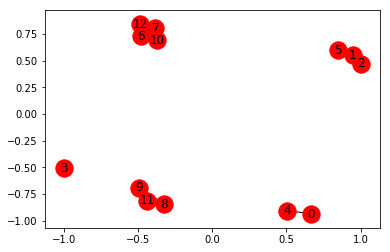

In [42]:
import matplotlib.pyplot as plt
nx.draw_networkx(g)
plt.show()